# Predicting Fuel Consumption for cars

## 1. Importing the libraries 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

## 2. Load the Dataset

In [2]:
data=pd.read_csv("auto_mpg_dataset.csv",sep=",")

In [3]:
data.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,17.0


## 3. Exploratory Data Analysis (EDA)

In [4]:
data.tail()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
393,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl,27.0
394,4,97.0,52.0,2130.0,24.6,82,2,vw pickup,44.0
395,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage,32.0
396,4,120.0,79.0,2625.0,18.6,82,1,ford ranger,28.0
397,4,119.0,82.0,2720.0,19.4,82,1,chevy s-10,31.0


In [5]:
#shape of data
data.shape

(398, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    float64
 3   weight        398 non-null    float64
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   car_name      398 non-null    object 
 8   mpg           398 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [7]:
data.isna().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
mpg             0
dtype: int64

In [8]:
data.describe()    #only float and int data type are taken as input


,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,-1404.643216,2970.424623,15.568090,76.010050,1.572864,23.514573
std,1.701004,104.269838,12213.424763,846.841774,2.757689,3.697627,0.802055,7.815984
min,3.000000,68.000000,-100000.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000,17.500000
50%,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000,23.000000
75%,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


**We have zero null values in dataset**

In [9]:
#columns of data
data.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin', 'car_name', 'mpg'],
      dtype='object')

In [10]:
#checking for duplicated values
data.duplicated().sum()

0

**We have zero duplicated values**

**Checking for value counts in categorical columns**

*Categorical columns are cylinders, model_year, origin, car_name*

In [11]:
data['cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [12]:
data['model_year'].value_counts()

73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: model_year, dtype: int64

In [13]:
data['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [14]:
data["car_name"].nunique()

305

In [15]:
data["car_name"].value_counts().head(20)

ford pinto                   6
ford maverick                5
amc matador                  5
toyota corolla               5
amc gremlin                  4
toyota corona                4
amc hornet                   4
chevrolet chevette           4
chevrolet impala             4
peugeot 504                  4
chevrolet caprice classic    3
dodge colt                   3
plymouth duster              3
volkswagen dasher            3
chevrolet nova               3
chevrolet vega               3
ford galaxie 500             3
plymouth fury iii            3
chevrolet citation           3
pontiac catalina             3
Name: car_name, dtype: int64

**We found that car_name column in data is not useful for model since there are very few car names which are repeated**


**But we can extract some information from that column such as Brand of the car**

In [16]:
data["car_name"].values[:10]

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl'], dtype=object)

**We can see a pattern among those names**

*Brand_name model variant* 

*Let's extract Brand information from car_name column*

In [17]:
data['brand'] = data["car_name"].str.extract('(^.*?)\s')
#brands=data["brand"]
#brands=data["brand"].unique().astype('str')
#brands
data["brand"].value_counts()[:10]


ford          51
chevrolet     43
plymouth      31
dodge         28
amc           28
toyota        25
datsun        23
buick         17
pontiac       16
volkswagen    15
Name: brand, dtype: int64

**There are few brand names which are repeated but in different letters**

*for example: chevrolet is repeated as chevy,chevroelt etc.*


*So, Let's replace those brand names as basic brand name*

In [18]:
data['brand'] = data['brand'].replace(['volkswagen','vokswagen','vw'],'VW')
data['brand'] = data['brand'].replace(['chevrolet','chevy','chevroelt'],'chevrolet')
data['brand'] = data['brand'].replace('maxda','mazda')
data['brand'] = data['brand'].replace('toyouta','toyota')
data['brand'] = data['brand'].replace('mercedes','mercedes-benz')
data['brand'] = data['brand'].replace('nissan','datsun')
data['brand'] = data['brand'].replace('capri','ford')
data['brand'] = data['brand'].replace('nissan','datsun')

In [19]:
#Checking for any null values in brand
data[data['brand'].isnull()]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand
150,4,108.0,93.0,2391.0,15.5,74,3,subaru,26.0,NaN
346,4,97.0,67.0,2065.0,17.8,81,3,subaru,32.3,NaN


**We found that there are two null values**

*We can fill those values with their car name "subaru"*

In [20]:
data['brand'].fillna(value = 'subaru',inplace=True) 

In [21]:
data["brand"]=data["brand"].str.capitalize()

In [22]:
data.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0,Chevrolet
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,15.0,Buick
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.0,Plymouth
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,16.0,Amc
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,17.0,Ford


In [23]:
def country(x):
    if x==1:
        return "USA"
    elif x==2:
        return "Europe"
    elif x==3:
        return "Japan"

In [24]:
data["origin"]=data["origin"].apply(country)

In [25]:
data.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand
0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu,18.0,Chevrolet
1,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320,15.0,Buick
2,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite,18.0,Plymouth
3,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst,16.0,Amc
4,8,302.0,140.0,3449.0,10.5,70,USA,ford torino,17.0,Ford


**Ploting Pair Plots in order to visualize any outliers in dataset**

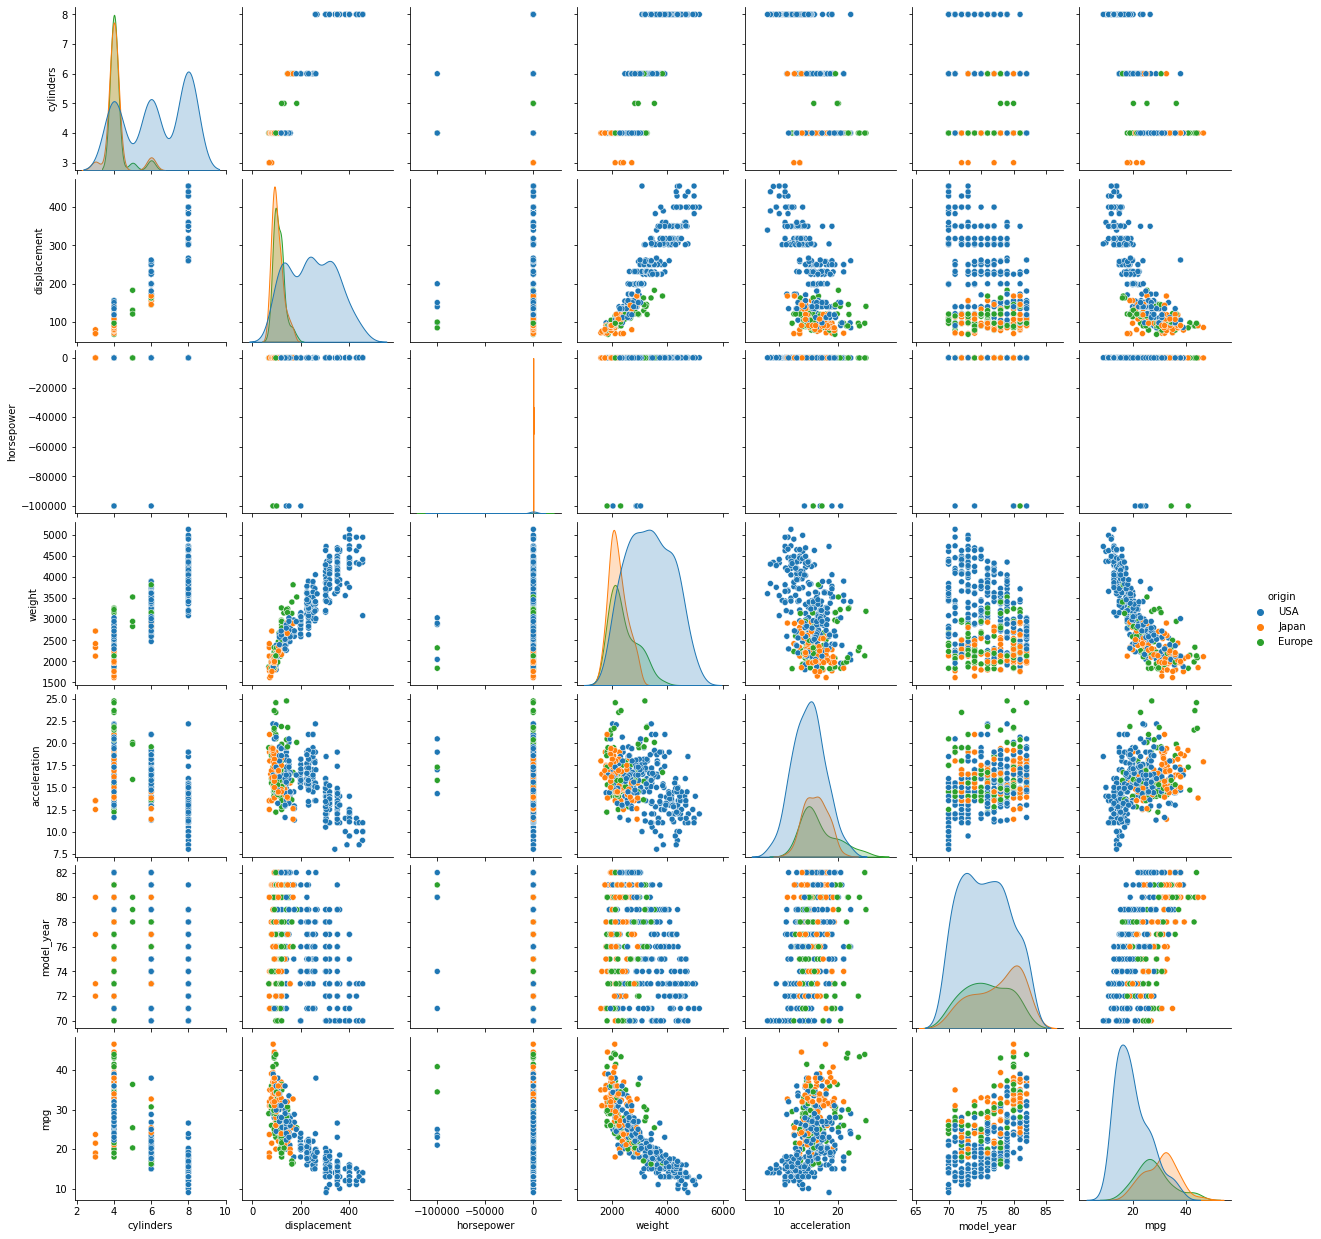

In [33]:
sns.pairplot(data,hue="origin")          #plots each column vs column

**There is some issue with "horsepower" column**

*Few data points are plotted at -10000*

*These are the outliers in our data*


***Let's visualize that column little more***


<AxesSubplot:>

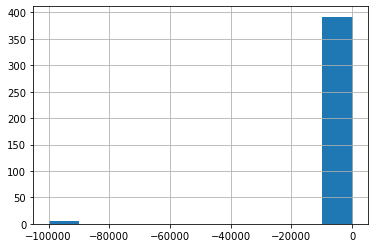

In [34]:
#Distribution of horsepower for all cars
data["horsepower"].hist()

In [35]:
#Range of horsepower
print("minimum value: {} \nmaximum value : {}".format(data["horsepower"].min(),data.horsepower.max()))

minimum value: -100000.0 
maximum value : 230.0


**There are few data points which have horsepower as -100000**

**Let's get those data points** 


In [36]:
data[data["horsepower"]<=0]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand
32,4,98.0,-100000.0,2046.0,19.0,71,USA,ford pinto,25.0,Ford
126,6,200.0,-100000.0,2875.0,17.0,74,USA,ford maverick,21.0,Ford
330,4,85.0,-100000.0,1835.0,17.3,80,Europe,renault lecar deluxe,40.9,Renault
336,4,140.0,-100000.0,2905.0,14.3,80,USA,ford mustang cobra,23.6,Ford
354,4,100.0,-100000.0,2320.0,15.8,81,Europe,renault 18i,34.5,Renault
374,4,151.0,-100000.0,3035.0,20.5,82,USA,amc concord dl,23.0,Amc


In [37]:
data[data["car_name"]=="ford pinto"]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand
32,4,98.0,-100000.0,2046.0,19.0,71,USA,ford pinto,25.0,Ford
112,4,122.0,85.0,2310.0,18.5,73,USA,ford pinto,19.0,Ford
130,4,122.0,80.0,2451.0,16.5,74,USA,ford pinto,26.0,Ford
168,4,140.0,83.0,2639.0,17.0,75,USA,ford pinto,23.0,Ford
174,6,171.0,97.0,2984.0,14.5,75,USA,ford pinto,18.0,Ford
206,4,140.0,72.0,2565.0,13.6,76,USA,ford pinto,26.5,Ford


In [38]:
data[data["car_name"]=="ford maverick"]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand
17,6,200.0,85.0,2587.0,16.0,70,USA,ford maverick,21.0,Ford
100,6,250.0,88.0,3021.0,16.5,73,USA,ford maverick,18.0,Ford
126,6,200.0,-100000.0,2875.0,17.0,74,USA,ford maverick,21.0,Ford
155,6,250.0,72.0,3158.0,19.5,75,USA,ford maverick,15.0,Ford
193,6,200.0,81.0,3012.0,17.6,76,USA,ford maverick,24.0,Ford


In [39]:
data[data["car_name"]=="renault 18i"]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand
354,4,100.0,-100000.0,2320.0,15.8,81,Europe,renault 18i,34.5,Renault


**We noticed that car_name as renault 18i has only one data point**

*So, for these situations we can see their brand*

In [40]:
data[data["brand"]=="Renault"]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand
79,4,96.0,69.0,2189.0,18.0,72,Europe,renault 12 (sw),26.0,Renault
186,4,101.0,83.0,2202.0,15.3,76,Europe,renault 12tl,27.0,Renault
218,4,79.0,58.0,1825.0,18.6,77,Europe,renault 5 gtl,36.0,Renault
330,4,85.0,-100000.0,1835.0,17.3,80,Europe,renault lecar deluxe,40.9,Renault
354,4,100.0,-100000.0,2320.0,15.8,81,Europe,renault 18i,34.5,Renault


*We can use these data points to find a median value for outlier*

**We can fill the median values of each car horsepower for outliers**

**If there are any single outlier for a particular car, Let's go with the similar Brand's median value**

*Array of car_names which have horsepower < 0*

In [41]:
cars=data[data["horsepower"]<=0]["car_name"].unique()
cars

array(['ford pinto', 'ford maverick', 'renault lecar deluxe',
       'ford mustang cobra', 'renault 18i', 'amc concord dl'],
      dtype=object)

In [42]:

for car in cars:
    med=0
    brand=data[data["car_name"]==cars[3]]["brand"].values
    med=data.loc[(data["car_name"]==car) & (data["horsepower"]>0),"horsepower"].median()
   
    data.loc[(data["car_name"]==car) & (data["horsepower"]<=0),"horsepower"]=np.nan
    data.fillna(med,inplace=True)
    med_brand=data.loc[(data["brand"]==brand[0]) & (data["horsepower"]>0),"horsepower"].median()
    data.fillna(med_brand,inplace=True)

In [43]:
data[data["car_name"]=="ford maverick"]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand
17,6,200.0,85.0,2587.0,16.0,70,USA,ford maverick,21.0,Ford
100,6,250.0,88.0,3021.0,16.5,73,USA,ford maverick,18.0,Ford
126,6,200.0,83.0,2875.0,17.0,74,USA,ford maverick,21.0,Ford
155,6,250.0,72.0,3158.0,19.5,75,USA,ford maverick,15.0,Ford
193,6,200.0,81.0,3012.0,17.6,76,USA,ford maverick,24.0,Ford


In [44]:
data[data["horsepower"]<=0]
#All outliers have been either filled with their car_name's median value 

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand


In [45]:
#or if the car_name has only single row then it has been filled with the their Brand's median value
data[data["car_name"]=="renault 18i"]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand
354,4,100.0,89.0,2320.0,15.8,81,Europe,renault 18i,34.5,Renault


*Cars with brand name as "renault"*

In [46]:
data[data["brand"]=="Renault"]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand
79,4,96.0,69.0,2189.0,18.0,72,Europe,renault 12 (sw),26.0,Renault
186,4,101.0,83.0,2202.0,15.3,76,Europe,renault 12tl,27.0,Renault
218,4,79.0,58.0,1825.0,18.6,77,Europe,renault 5 gtl,36.0,Renault
330,4,85.0,89.0,1835.0,17.3,80,Europe,renault lecar deluxe,40.9,Renault
354,4,100.0,89.0,2320.0,15.8,81,Europe,renault 18i,34.5,Renault


**Visualizing the distribution of horsepower**

<AxesSubplot:>

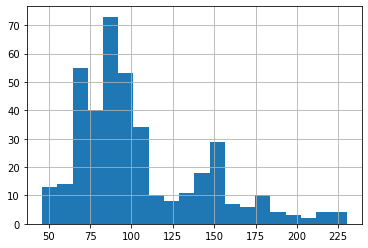

In [47]:
data["horsepower"].hist(bins=20)

**Number of brands from each origin**

In [48]:
plt.figure(figsize=(20,8))
brands_USA=data[data["origin"]=="USA"]["brand"]
brands_Europe=data[data["origin"]=="Europe"]["brand"]
brands_Japan=data[data["origin"]=="Japan"]["brand"]
brand_origin=pd.DataFrame([["USA",brands_USA.nunique()],["Europe",brands_Europe.nunique()],["Japan",brands_Japan.nunique()]],
                          columns=["Origin Country","Total no. of brands"])
brand_origin

,Origin Country,Total no. of brands
0,USA,12
1,Europe,11
2,Japan,5


<Figure size 1440x576 with 0 Axes>

**Number of unique car_names** 

<AxesSubplot:>

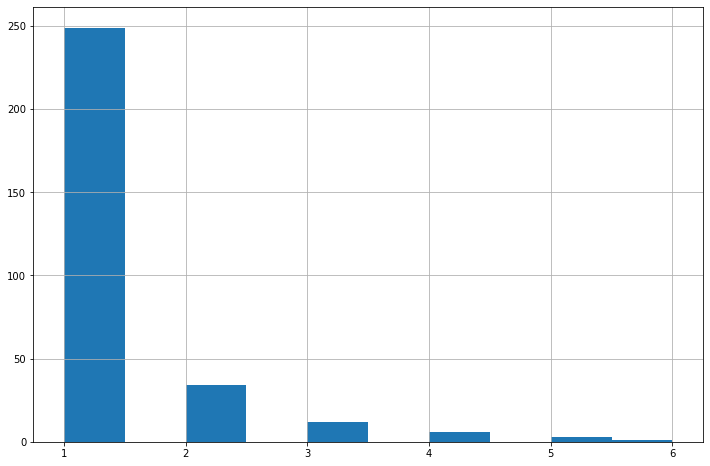

In [49]:
plt.figure(figsize=(12,8))
data["car_name"].value_counts().hist()


In [50]:
data["car_name"].nunique()

305

***Most of the car_names are unique. So there is no useful information in that column. Let's drop that column***


In [51]:
data.drop("car_name",axis=1,inplace=True)

## 4. Data visualization

In [52]:
#Setting palette
sns.set_palette("bright")

In [53]:
data.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg,brand
0,8,307.0,130.0,3504.0,12.0,70,USA,18.0,Chevrolet
1,8,350.0,165.0,3693.0,11.5,70,USA,15.0,Buick
2,8,318.0,150.0,3436.0,11.0,70,USA,18.0,Plymouth
3,8,304.0,150.0,3433.0,12.0,70,USA,16.0,Amc
4,8,302.0,140.0,3449.0,10.5,70,USA,17.0,Ford


### 4.1 Plots for categorical features

#### 1. Number of cars according to brand in Top 20 cars with highest mpg  

<AxesSubplot:title={'center':'Number of cars according to brand in Top 20 cars with highest mpg'}, xlabel='brand', ylabel='count'>

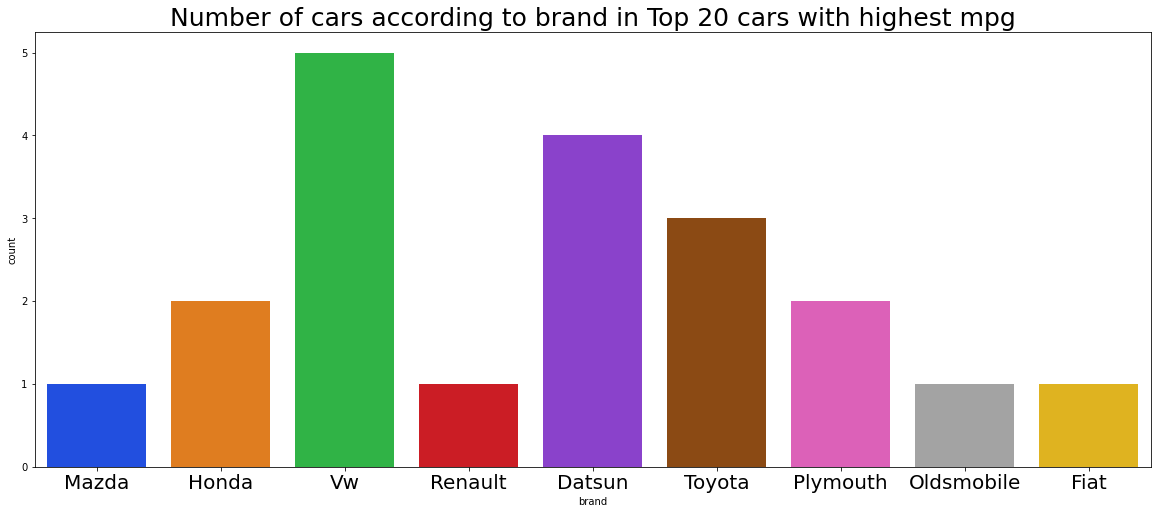

In [54]:
plt.figure(figsize=(20,8))
plt.title("Number of cars according to brand in Top 20 cars with highest mpg",fontsize=25)
plt.xticks(fontsize=20)

sns.countplot(data.sort_values(by="mpg",ascending=False)["brand"][:20])

*Volkswagen has 5 cars in top 20 highest mpg followed by Datsun with 4 cars*



#### 2.Average mpg values of cars in each cylinders from each origin

<AxesSubplot:title={'center':'MPG values according to Number of Cylinders'}, xlabel='cylinders', ylabel='mpg'>

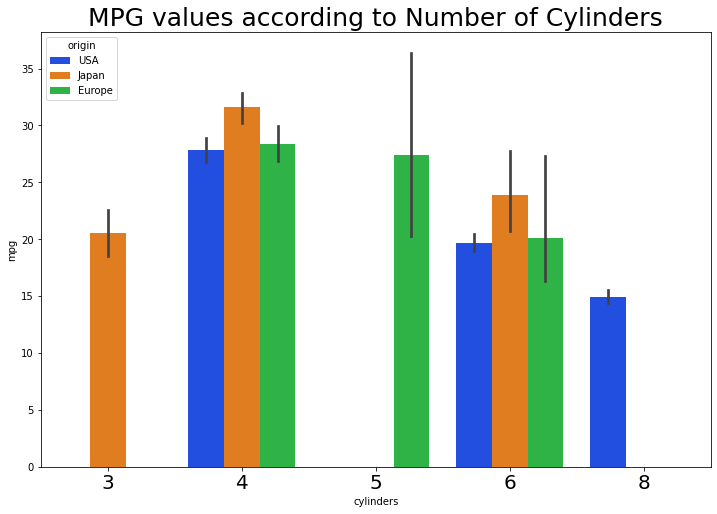

In [55]:
plt.figure(figsize=(12,8))
plt.title("MPG values according to Number of Cylinders",fontsize=25)
plt.xticks(fontsize=20)
sns.barplot(x="cylinders",y="mpg",data=data,hue="origin")

*Cars with 8 cylinders has the least Average mpg value*

*Overall USA has low Average mpg value*

#### 3.Average mpg values of cars in each Model year 


<AxesSubplot:title={'center':'MPG values according to Model year'}, xlabel='model_year', ylabel='mpg'>

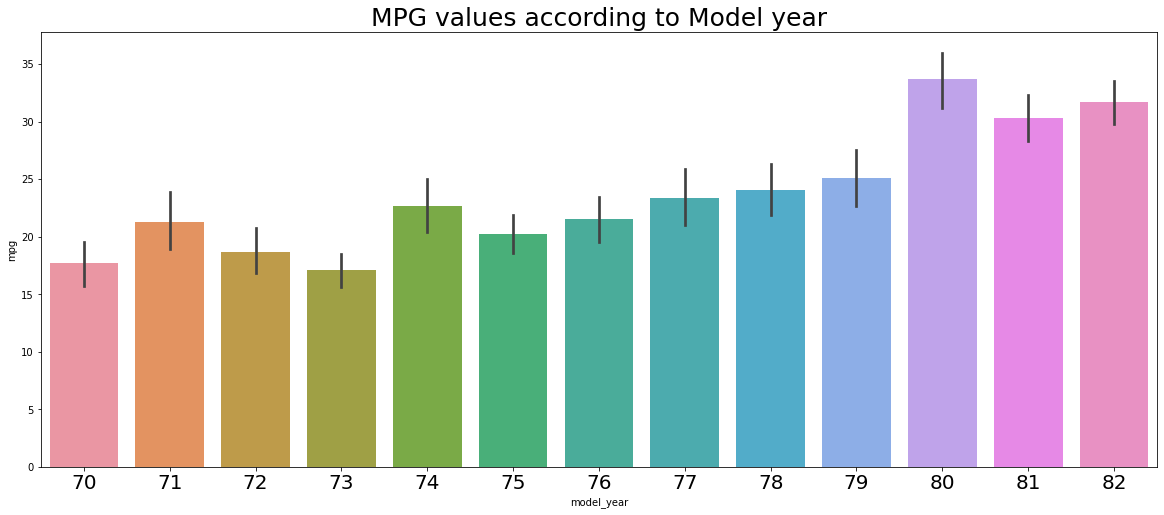

In [56]:
plt.figure(figsize=(20,8))
plt.title("MPG values according to Model year",fontsize=25)   
plt.xticks(fontsize=20)
sns.barplot(y="mpg",x="model_year",data=data)

*Cars of model year 80 has the highest average MPG value*

#### 4. Average mpg values of cars in each each origin from each origin

<AxesSubplot:title={'center':'MPG values according to Model year from each Origin'}, xlabel='model_year', ylabel='mpg'>

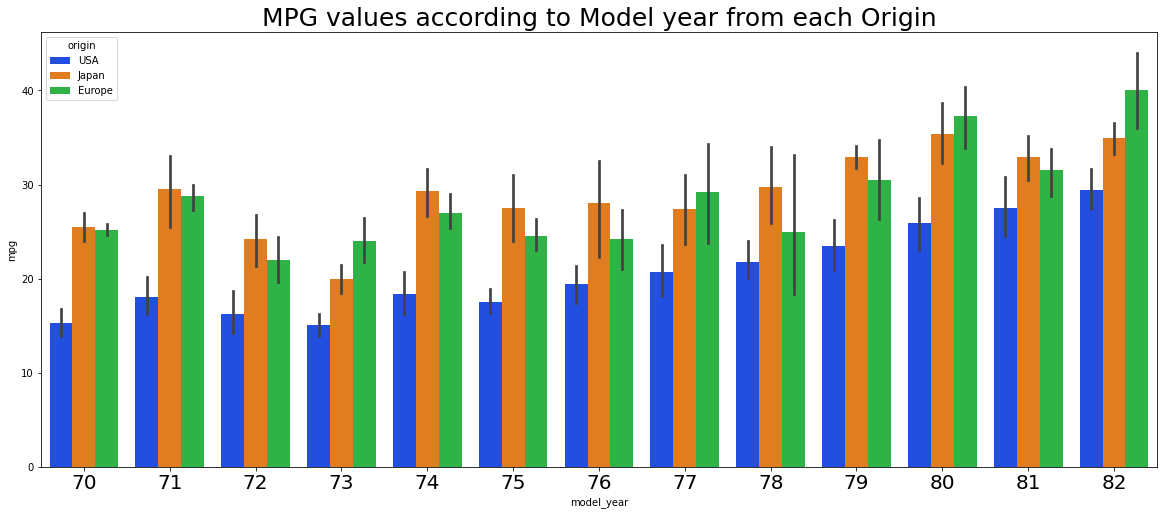

In [57]:
plt.figure(figsize=(20,8))
plt.title("MPG values according to Model year from each Origin",fontsize=25)
plt.xticks(fontsize=20)
sns.barplot(x="model_year",y="mpg",data=data,hue="origin")

*As we can see Average mpg values have been clearly improved as years passed by*

*Japan cars have the most number of highest averages of each year*

*Europe cars have improved average mpg value much better in 82*

#### 5. MPG values of each brand

###### Average mpg values of each Brand

<AxesSubplot:title={'center':'Average mpg values of each brand'}, xlabel='brand', ylabel='mpg'>

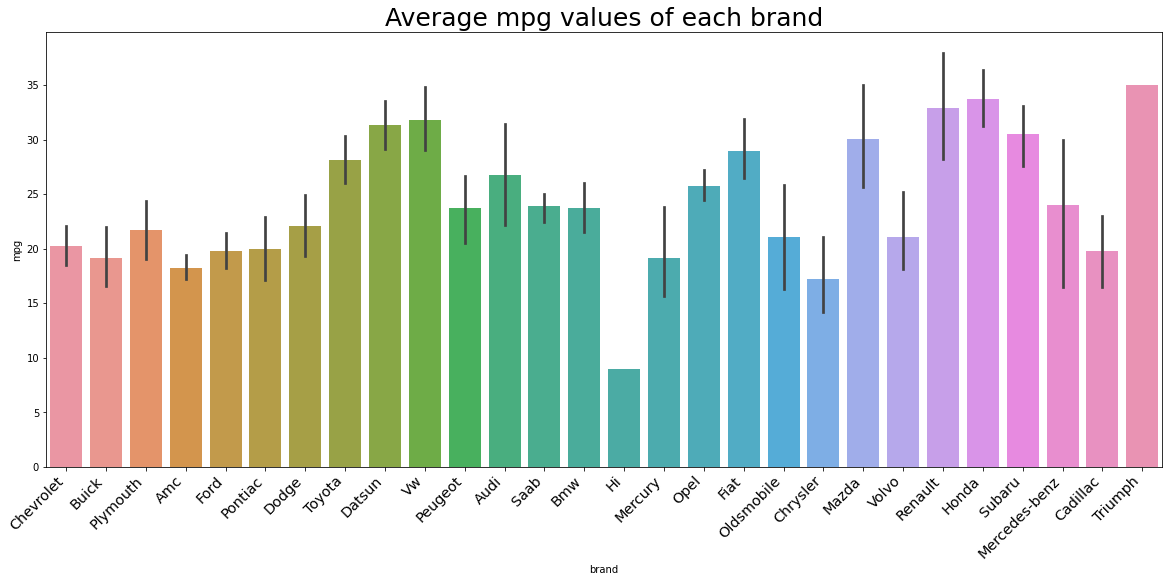

In [58]:
plt.figure(figsize=(20,8))
plt.title("Average mpg values of each brand",fontsize=25)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='x-large')


sns.barplot(x="brand",y="mpg",data=data)

##### 6. Maximum mpg value of each Brand

<AxesSubplot:title={'center':'Maximum mpg values of each brand'}, xlabel='brand', ylabel='mpg'>

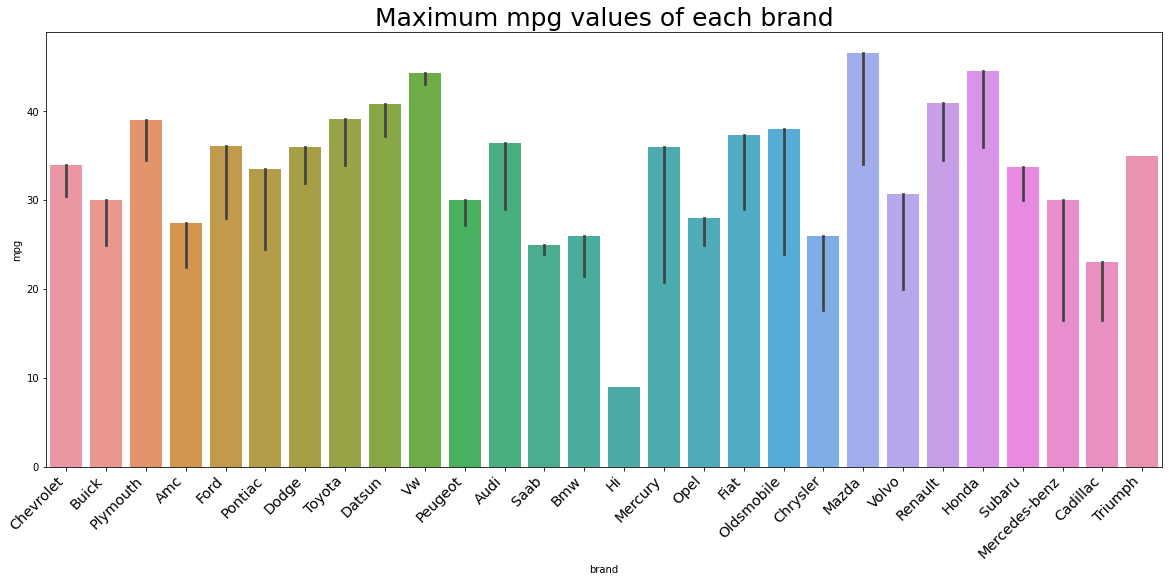

In [59]:
plt.figure(figsize=(20,8))
plt.title("Maximum mpg values of each brand",fontsize=25)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='x-large')


sns.barplot(x="brand",y="mpg",data=data,estimator=max)

***As we can see Mazda has Highest mpg value and Hi has the lowest mgp value***

*Renault cars have the highest average mpg value*

#### 7. Average of Mpg values according to origin

<AxesSubplot:title={'center':'Average MPG values according to Origin'}, xlabel='origin', ylabel='mpg'>

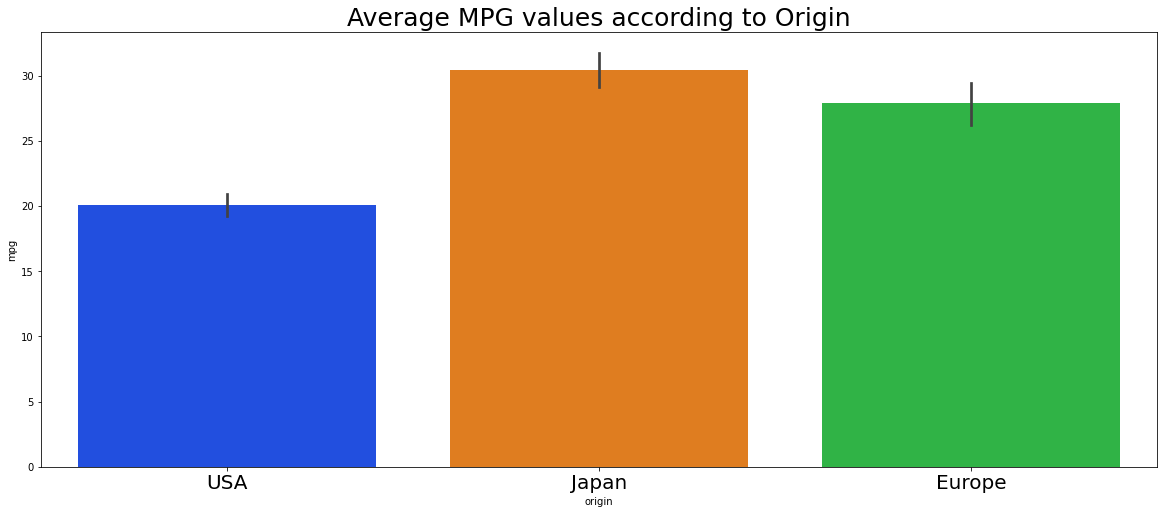

In [60]:
plt.figure(figsize=(20,8))
plt.title("Average MPG values according to Origin",fontsize=25)
plt.xticks(fontsize=20)
sns.barplot(y="mpg",x="origin",data=data)

*Japan has highest average mpg value and USA has least*

#### 2. Joint plots

##### Mpg vs Displacement

<Figure size 864x576 with 0 Axes>

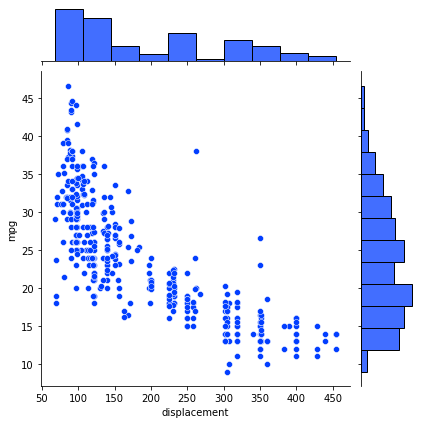

In [61]:
plt.figure(figsize=(12,8))
sns.jointplot("displacement","mpg",data)

#####  Mpg vs Horsepower

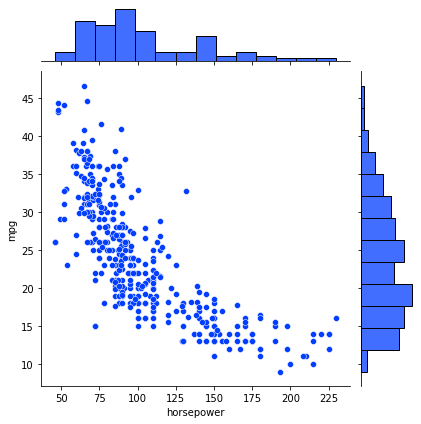

In [62]:
#joint plot for horsepower and weight of car
sns.jointplot("horsepower","mpg",data)

##### Mpg vs Weight

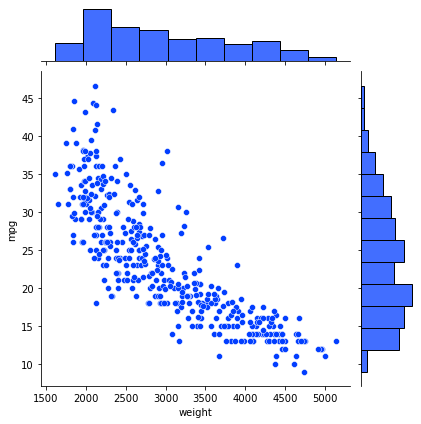

In [63]:
#joint plot for horsepower and weight of car
sns.jointplot("weight","mpg",data)

##### Mpg vs Acceleration

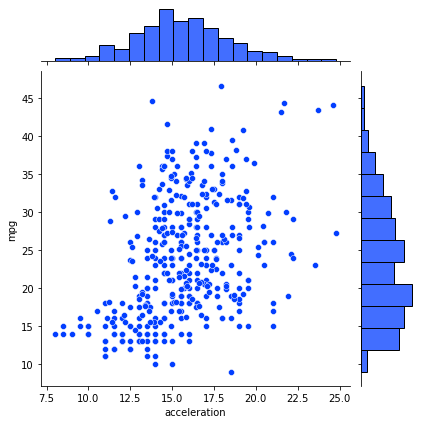

In [64]:
#joint plot for horsepower and weight of car
sns.jointplot("acceleration","mpg",data)

***As we see MPG value decreases as we increase weight or displacement or horsepower of car***

***Mpg value only increases slightly when we increase Acceleration of car***

###  Heatmaps

#### Heat map of correlation of data

<AxesSubplot:>

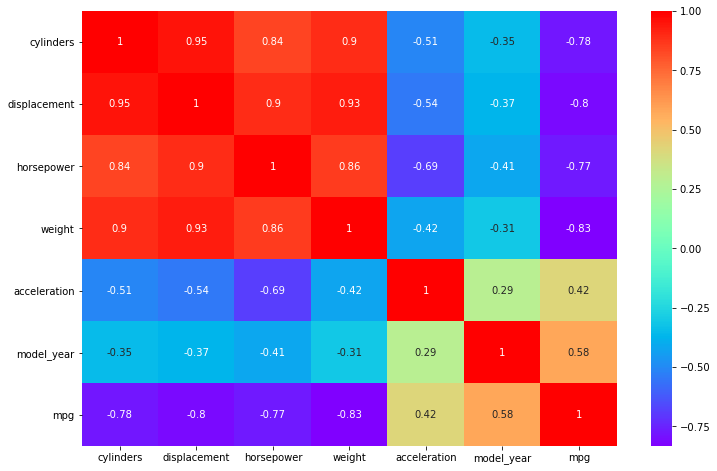

In [65]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,cmap="rainbow")

## 5. Data Preprocessing

In [112]:
data.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg,brand
0,8,307.0,130.0,3504.0,12.0,70,USA,18.0,Chevrolet
1,8,350.0,165.0,3693.0,11.5,70,USA,15.0,Buick
2,8,318.0,150.0,3436.0,11.0,70,USA,18.0,Plymouth
3,8,304.0,150.0,3433.0,12.0,70,USA,16.0,Amc
4,8,302.0,140.0,3449.0,10.5,70,USA,17.0,Ford


### 5.1 X and Y values

**mpg column is target variable**

In [54]:
#Dependent variable

y=data.iloc[:,7].values

In [55]:
#Independent variable

x=data.drop("mpg",axis=1).values

In [56]:
x[:10]

array([[8, 307.0, 130.0, 3504.0, 12.0, 70, 'USA', 'Chevrolet'],
       [8, 350.0, 165.0, 3693.0, 11.5, 70, 'USA', 'Buick'],
       [8, 318.0, 150.0, 3436.0, 11.0, 70, 'USA', 'Plymouth'],
       [8, 304.0, 150.0, 3433.0, 12.0, 70, 'USA', 'Amc'],
       [8, 302.0, 140.0, 3449.0, 10.5, 70, 'USA', 'Ford'],
       [8, 429.0, 198.0, 4341.0, 10.0, 70, 'USA', 'Ford'],
       [8, 454.0, 220.0, 4354.0, 9.0, 70, 'USA', 'Chevrolet'],
       [8, 440.0, 215.0, 4312.0, 8.5, 70, 'USA', 'Plymouth'],
       [8, 455.0, 225.0, 4425.0, 10.0, 70, 'USA', 'Pontiac'],
       [8, 390.0, 190.0, 3850.0, 8.5, 70, 'USA', 'Amc']], dtype=object)

In [57]:
y[:10]

array([18., 15., 18., 16., 17., 15., 14., 14., 14., 15.])

In [58]:
x.shape

(398, 8)

### 5.2 Encoding Categorical Data

**OneHotEncoding**

1.origin x[:,6]

2.cylinders x[:,0]


In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encode',OneHotEncoder(),[0,6])],
                    remainder="passthrough")
x_s=np.array(ct.fit_transform(x))
x_s[29]


array([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 97.0, 88.0, 2130.0, 14.5,
       71, 'Datsun'], dtype=object)

In [60]:
x_s[:,8:]

array([[307.0, 130.0, 3504.0, 12.0, 70, 'Chevrolet'],
       [350.0, 165.0, 3693.0, 11.5, 70, 'Buick'],
       [318.0, 150.0, 3436.0, 11.0, 70, 'Plymouth'],
       ...,
       [135.0, 84.0, 2295.0, 11.6, 82, 'Dodge'],
       [120.0, 79.0, 2625.0, 18.6, 82, 'Ford'],
       [119.0, 82.0, 2720.0, 19.4, 82, 'Chevrolet']], dtype=object)

**LabelEncoding**

3.model_year x[:,12]

4.Brand x[:,13]

In [61]:
from sklearn.preprocessing import LabelEncoder
le_brand=LabelEncoder()
le_year=LabelEncoder()
x_s[:,13]=le_brand.fit_transform(x_s[:,13].astype(str))
x_s[:,12]=le_year.fit_transform(x_s[:,12])
x_s[:2]

array([[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 307.0, 130.0, 3504.0,
        12.0, 0, 5],
       [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 350.0, 165.0, 3693.0,
        11.5, 0, 3]], dtype=object)

In [62]:
newdata=pd.DataFrame(x_s,columns=["3","4","5","6","8","Europe","Japan","USA","displacement","horsepower","weight","acceleration","model_year","brand"])
newdata.head()

,3,4,5,6,8,Europe,Japan,USA,displacement,horsepower,weight,acceleration,model_year,brand
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,307.0,130.0,3504.0,12.0,0,5
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,350.0,165.0,3693.0,11.5,0,3
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,318.0,150.0,3436.0,11.0,0,19
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,304.0,150.0,3433.0,12.0,0,0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,302.0,140.0,3449.0,10.5,0,10


**The first eight columns have binary values**

**The last two columns have labelled values**

### 5.3 Train_test_split

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_s,y,test_size=0.3,random_state=101)

In [64]:
x_train

array([[0.0, 0.0, 0.0, ..., 13.0, 1, 19],
       [0.0, 1.0, 0.0, ..., 14.0, 1, 24],
       [0.0, 1.0, 0.0, ..., 14.5, 8, 8],
       ...,
       [0.0, 1.0, 0.0, ..., 17.0, 10, 12],
       [0.0, 0.0, 0.0, ..., 8.0, 0, 19],
       [0.0, 1.0, 0.0, ..., 16.2, 11, 10]], dtype=object)

In [65]:
x_test.shape

(120, 14)

### 5.4 Feature Scaling

In [66]:
x_train[:2]

array([[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 318.0, 150.0, 4096.0,
        13.0, 1, 19],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 113.0, 95.0, 2228.0,
        14.0, 1, 24]], dtype=object)

***In X*** 

***numerical columns starts from 8 and ends at 11***

*column 8 is displacement*

*column 9 is horsepower*

*column 10 is weight*

*column 11 is acceleration*

**x[:,8:-1]**

In [67]:
x_train_scaled=x_train
x_test_scaled=x_test

In [68]:

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled[:,8:12]=sc.fit_transform(x_train_scaled[:,8:12])
x_test_scaled[:,8:12]=sc.transform(x_test_scaled[:,8:12])
x_train_scaled[:,8:12]

array([[1.2596781749708823, 1.2137233256921693, 1.3675409947908699,
        -0.9477638194514814],
       [-0.7513606706510961, -0.2374676072006418, -0.8700943222910615,
        -0.5852454625341561],
       [-0.8298402353582953, -0.7651734009798459, -0.8676985671335863,
        -0.4039862840754934],
       ...,
       [-0.8102203441814955, -0.8443292700467264, -0.7958259124093272,
        0.5023096082178199],
       [1.47549697791568, 1.4775762225817712, 0.7841746139456339,
        -2.760355604038108],
       [-0.8985098544770945, -1.029026297869448, -1.0893059192000516,
        0.21229492268395941]], dtype=object)

In [69]:
x_train


array([[0.0, 0.0, 0.0, ..., -0.9477638194514814, 1, 19],
       [0.0, 1.0, 0.0, ..., -0.5852454625341561, 1, 24],
       [0.0, 1.0, 0.0, ..., -0.4039862840754934, 8, 8],
       ...,
       [0.0, 1.0, 0.0, ..., 0.5023096082178199, 10, 12],
       [0.0, 0.0, 0.0, ..., -2.760355604038108, 0, 19],
       [0.0, 1.0, 0.0, ..., 0.21229492268395941, 11, 10]], dtype=object)

## 6. Machine Learning Models

### 6.1 Linear Regression

#### Training the model

In [70]:
from sklearn.linear_model import LinearRegression
Linreg=LinearRegression()
Linreg.fit(x_train,y_train)

LinearRegression()

#### Model Prediction

In [71]:
P_linreg=Linreg.predict(x_test)


#### Evaluting the model

In [72]:
from sklearn.metrics import mean_squared_error,r2_score
mse_linreg=mean_squared_error(y_test,P_linreg)

print(np.sqrt(mse_linreg))

3.043589961027452


In [73]:
lin_score=r2_score(y_test,P_linreg)*100
print(lin_score)

85.21942054278513


### 6.2 K Nearest Neighbour(KNN) Regression

###### Training the model

In [74]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 6)         
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=6)

###### Model Prediction 

In [75]:
y_pred = knn.predict(x_test)

###### Evaluating the model

In [76]:
mse_knnreg=mean_squared_error(y_test,y_pred)

print(np.sqrt(mse_knnreg))

3.506753075086644


In [77]:
knnr_score=r2_score(y_test, y_pred)*100
knnr_score

80.37862005137899

### 6.3 Decision tree Regression

###### Training the model

In [78]:
#Decision tree regression observes features of an object and trains a model in the structure of a tree to 
#predict data in the future to produce meaningful continuous output

from sklearn.tree import DecisionTreeRegressor
drm = DecisionTreeRegressor()
drm.fit(x_train, y_train)

DecisionTreeRegressor()

###### Model prediction

In [79]:
y_pred = drm.predict(x_test)

###### Evaluating the Model

In [80]:
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(np.sqrt(mse))

3.6502054736685716


In [81]:
dtr_score=r2_score(y_test, y_pred)*100
dtr_score

78.7404631693596

## 7.  Ensemble

### 7.1 Voting Regressor

###### declaring and appending all models in voting regressor

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor

reg1 = KNeighborsRegressor(n_neighbors = 6)
reg2 = DecisionTreeRegressor()
reg3 = LinearRegression()


reg1.fit(x_train, y_train)
reg2.fit(x_train, y_train)
reg3.fit(x_train, y_train)

ereg = VotingRegressor([('kr', reg1), ('dr', reg2), ('lr', reg3)])
ereg.fit(x_train, y_train)

VotingRegressor(estimators=[('kr', KNeighborsRegressor(n_neighbors=6)),
                            ('dr', DecisionTreeRegressor()),
                            ('lr', LinearRegression())])

###### Predicting the model

In [83]:
y1=ereg.predict(x_test)

###### Evaluating the model

In [84]:
print(np.sqrt(mean_squared_error(y_test,y1)))

2.707815656402106


In [85]:
voting_score = r2_score(y_test, y1)*100
voting_score

88.30076769791634

### 7.2 Random Forest Regression 

#### Training the model

In [86]:
from sklearn.ensemble import RandomForestRegressor
randomforest=RandomForestRegressor(n_estimators=100,random_state=101)
randomforest.fit(x_train,y_train)

RandomForestRegressor(random_state=101)

#### Model Prediction

In [87]:
P_forest=randomforest.predict(x_test)

#### Evaluting the model

In [88]:
print(np.sqrt(mean_squared_error(y_test,P_forest)))

2.3732762042515527


In [89]:
forest_score=r2_score(y_test,P_forest)*100
print(forest_score)

91.01297925651212


## 8. Model Selection

### Score comparison

In [90]:
Score=pd.DataFrame({"Model_name":["Linear Regression","KNN Regression", "Decision tree Regression","Voting Regression","Random Forest Regression"],
                   "Accuracy_score":[lin_score,knnr_score,dtr_score,voting_score,forest_score]})

In [91]:
Score

,Model_name,Accuracy_score
0,Linear Regression,85.219421
1,KNN Regression,80.378620
2,Decision tree Regression,78.740463
3,Voting Regression,88.300768
4,Random Forest Regression,91.012979


**As you can see from above data "Random Forest Regressor" Given the highest Accuracy score**

### Feature Importance

In [92]:
Feature_importance=pd.DataFrame(randomforest.feature_importances_,index=["3","4","5","6","8","Europe","Japan","USA","displacement","horsepower","weight","acceleration","model_year","brand"])
Feature_importance[8:]

,0
displacement,0.325773
horsepower,0.184605
weight,0.215030
acceleration,0.022857
model_year,0.133952
brand,0.011483


**We found that Fuel consumption of a car is mostly affected by Displacement and Weight of the car**

**AS you can see Our model is working good its predicted Mpg is Nearly to the Actual Mpg**

## 9. Clustering

### 9.1 K Means

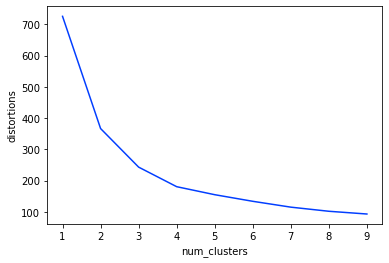

In [93]:
#now taking the "weight" and "displacement"
from scipy.cluster.vq import kmeans, vq
import seaborn as sns

data = pd.read_csv("auto_mpg_dataset.csv")
# Display top of dataframe
data.head()

#first will check how many clusters will be adiquate
distortions = []
num_clusters = range(1, 10)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(data[["weight","displacement"]],i)
    distortions.append(distortion)

# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x="num_clusters", y="distortions", data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

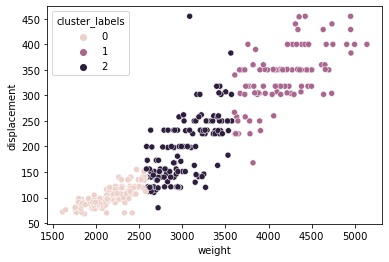

In [94]:
cluster_centers, distortion = kmeans(data[["weight","displacement"]],3)

# Assigning cluster labels
data['cluster_labels'], distortion_list = vq(data[["weight","displacement"]],cluster_centers)

# Plotting clusters
sns.scatterplot(x='weight', y='displacement', 
                hue='cluster_labels', data = data)
plt.show()


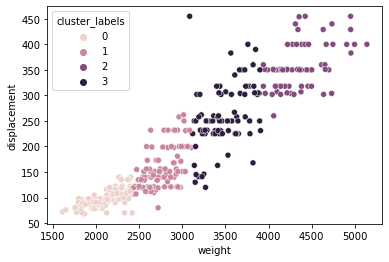

In [95]:
cluster_centers, distortion = kmeans(data[["weight","displacement"]],4)

# Assigning cluster labels
data['cluster_labels'], distortion_list = vq(data[["weight","displacement"]],cluster_centers)

# Plotting clusters
sns.scatterplot(x='weight', y='displacement', 
                hue='cluster_labels', data = data)
plt.show()


In [96]:
data.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,cluster_labels
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0,3
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,15.0,3
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.0,3
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,16.0,3
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,17.0,3


In [97]:
data['cluster_labels'].unique()

array([3, 2, 0, 1])